<a href="https://colab.research.google.com/github/megboes/groves-research/blob/main/groves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp

max_num_boxes=10

In [157]:
T1 = np.array([[math.sqrt(3)+3, math.sqrt(3)-3, -2*math.sqrt(3)],
              [math.sqrt(3)-3, math.sqrt(3)+3, -2*math.sqrt(3)]])
T = (1/6)*T1

pi_0=[[]]
pi_1=[[[0,0,0]]]
pi_2=[[[0,0,0],[0,0,1]],[[0,0,0],[0,1,0]],[[0,0,0],[1,0,0]]]
master_pi=[pi_0,pi_1,pi_2]

In [158]:
def check_if_box_should_be_added(box, partition):
  we_should_add=True
  a,b,c=box
  if box in partition:
    we_should_add=False
  if (a>=1)and([a-1,b,c] in partition)==False:
    we_should_add=False
  if (b>=1)and([a,b-1,c] in partition)==False:
    we_should_add=False
  if (c>=1)and([a,b,c-1] in partition)==False:
    we_should_add=False
  return(we_should_add)

def given_single_partitions_produces_list_of_bigger_partitions(given_partition):
  some_partitions_of_more_boxes = []
  for element in given_partition:
    a,b,c=element
    candidate=[a+1,b,c]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)

  for element in given_partition:
    a,b,c=element
    candidate=[a,b+1,c]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)

  for element in given_partition:
    a,b,c=element
    candidate=[a,b,c+1]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)
  return(some_partitions_of_more_boxes)

def deletes_duplicates(collection_of_partitions):
  trial=collection_of_partitions
  for element in trial:
   number=trial.count(element)
   while number >=2:
     trial.remove(element)
     number=trial.count(element)
  collection_of_partitions=trial
  return(collection_of_partitions)

In [159]:
def given_partition_determines_height(partition):
  #find size of space needed for grove
  height=0
  for box in partition:
    a,b,c=box
    height = max(height, a+b+c)
  height+=2
  return(height)

In [160]:
def generates_bigger_master_pi(master_pi):

################################### next block generates paritions up to max_num_boxes #################################3
#yeah, this should be it's own function
  for i in range(2,max_num_boxes):
    for part in master_pi[i]:
        if len(master_pi)==i+1:
          master_pi.append(given_single_partitions_produces_list_of_bigger_partitions(part))
        elif len(master_pi)==i+2:
          master_pi[i+1]+=given_single_partitions_produces_list_of_bigger_partitions(part)
        else: print('something went wrong')
    for part in master_pi[i+1]:
      part.sort()
      master_pi[i+1].sort()
    master_pi[i+1] = deletes_duplicates(master_pi[i+1])
  return(master_pi)
################ paritions up to max_num_boxes, i.e. MASTER_PI complete ###########################3


In [161]:
def adds_segment(x1,y1,x2,y2):
  # Plot the first line segment (from (x1,y1) to (x2,y2))
  ax.plot([x1, x2], [y1, y2],color='cyan', marker='o')
  ax.text(x1, y1, f'({x1},{y1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(x2, y2, f'({x2},{y2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)

def adds_green_segment(x1,y1,x2,y2):
    # Plot the first line segment (from (x1,y1) to (x2,y2))
  ax.plot([x1, x2], [y1, y2],color='green', marker='o')
  ax.text(x1, y1, f'({x1},{y1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(x2, y2, f'({x2},{y2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)


In [162]:
def adds_segment_from_3(x1,y1,z1,x2,y2,z2):
  V1=np.array([[x1],[y1],[z1]])
  V2=np.array([[x2],[y2],[z2]])
  D1 = np.matmul(T, V1)
  D2 = np.matmul(T, V2)
  ax.plot([D1[0][0], D2[0][0]], [D1[1][0], D2[1][0]],color='cyan', marker='o')
  ax.text(D1[0][0], D1[1][0], f'({x1},{y1},{z1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(D2[0][0], D2[1][0], f'({x2},{y2},{z2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)

def adds_green_segment_from_3(x1,y1,z1,x2,y2,z2):
  V1=np.array([[x1],[y1],[z1]])
  V2=np.array([[x2],[y2],[z2]])
  D1 = np.matmul(T, V1)
  D2 = np.matmul(T, V2)
  ax.plot([D1[0][0], D2[0][0]], [D1[1][0], D2[1][0]],color='green', marker='o')
  ax.text(D1[0][0], D1[1][0], f'({x1},{y1},{z1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(D2[0][0], D2[1][0], f'({x2},{y2},{z2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)


In [163]:
master_pi=generates_bigger_master_pi(master_pi)

for i in range(1, len(master_pi)):
  print("The "+str(len(master_pi[i]))+" partitions with "+str(i)+" boxes are:")
  #for guy in master_pi[i]:
    #print(guy)


The 1 partitions with 1 boxes are:
The 3 partitions with 2 boxes are:
The 6 partitions with 3 boxes are:
The 13 partitions with 4 boxes are:
The 24 partitions with 5 boxes are:
The 48 partitions with 6 boxes are:
The 86 partitions with 7 boxes are:
The 160 partitions with 8 boxes are:
The 282 partitions with 9 boxes are:
The 500 partitions with 10 boxes are:


This is a full box:


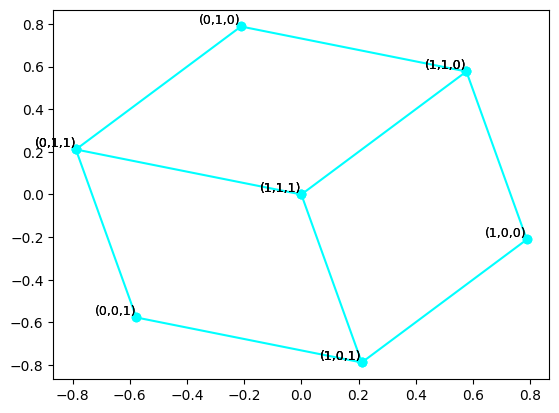

In [164]:
print("This is a full box:")
fig, ax = plt.subplots()
adds_segment_from_3(0,0,1,1,0,1)
adds_segment_from_3(0,0,1,0,1,1)
adds_segment_from_3(0,1,1,1,1,1)
adds_segment_from_3(1,0,1,1,1,1)
adds_segment_from_3(0,1,0,0,1,1)
adds_segment_from_3(1,1,0,1,1,1)
adds_segment_from_3(1,0,0,1,0,1)
adds_segment_from_3(0,1,0,1,1,0)
adds_segment_from_3(1,0,0,1,1,0)

plt.show()

In [165]:
#prints image of each partition
def prints_image_of_partition(partition):
  fig, ax = plt.subplots()
  for box in partition:
    a,b,c = box
    if [a,b,c+1] not in partition:
      adds_segment_from_3(a,b,c+1,a,b+1,c+1)
      adds_segment_from_3(a,b,c+1,a+1,b,c+1)
      adds_segment_from_3(a,b+1,c+1,a+1,b+1,c+1)
      adds_segment_from_3(a+1,b,c+1,a+1,b+1,c+1)
  plt.show()

[[0, 0, 0], [0, 0, 1]]


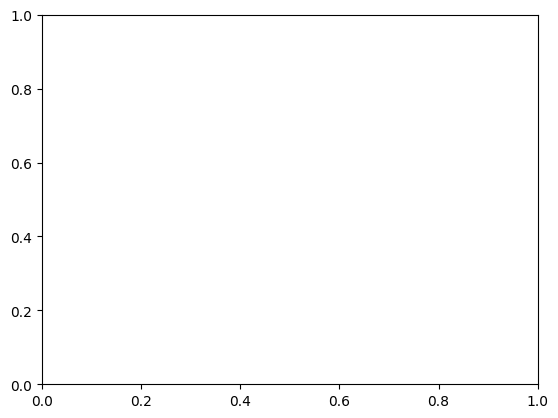

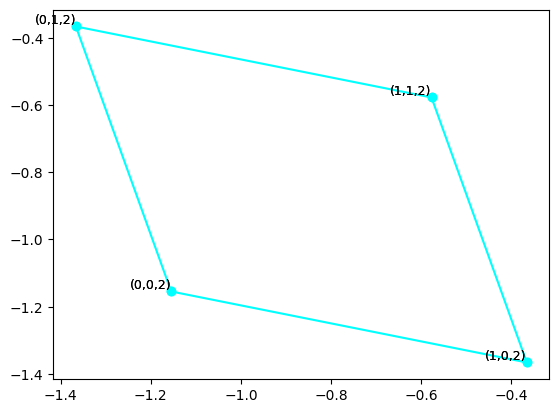

[[0, 0, 0], [0, 1, 0]]


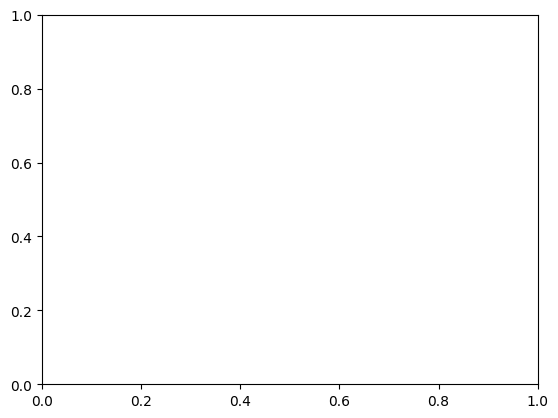

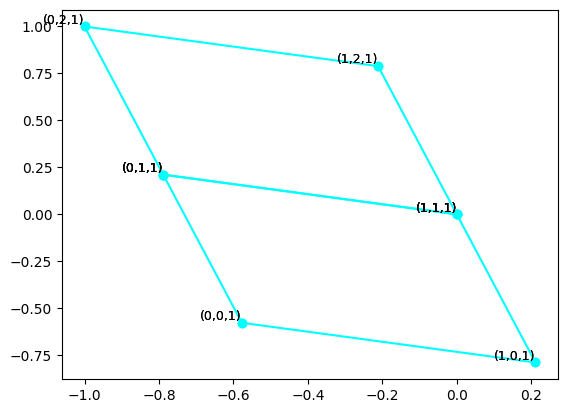

[[0, 0, 0], [1, 0, 0]]


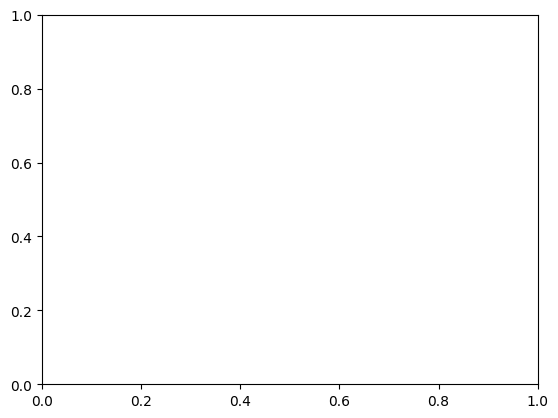

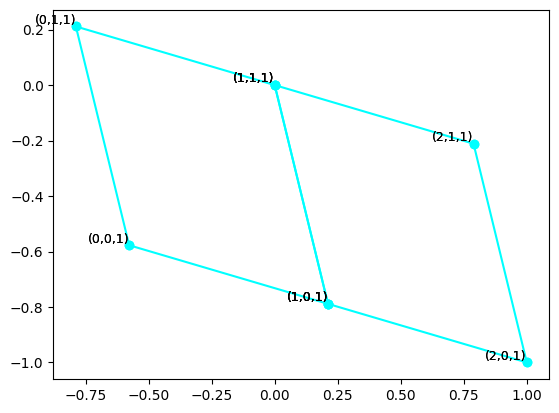

In [166]:
for pi in master_pi[2]:
  print(pi)
  prints_image_of_partition(pi)
  fig, ax = plt.subplots()
  for box in pi:
    a,b,c = box
    if [a,b,c+1] not in pi:
      adds_segment_from_3(a,b,c+1,a,b+1,c+1)
      adds_segment_from_3(a,b,c+1,a+1,b,c+1)
      adds_segment_from_3(a,b+1,c+1,a+1,b+1,c+1)
      adds_segment_from_3(a+1,b,c+1,a+1,b+1,c+1)
  plt.show()

In [167]:
#prints grove for each partition